In [2]:
import sys
sys.path.append('../')

In [3]:
import torchxrayvision as xrv
import torchvision
import torch

import numpy as np
from PIL import Image
from glob import glob
import matplotlib.pyplot as plt
import random
import seaborn as sns
%matplotlib inline

In [4]:
from src.chexnet import DenseNet121
from src.xrayvision import COVID19_Dataset

In [5]:
transform = torchvision.transforms.Compose([xrv.datasets.XRayCenterCrop(),xrv.datasets.XRayResizer(224)])

d_covid19 = COVID19_Dataset(
    '/Users/aniket/Google Drive/Projects/covid-research/data/covid-chestxray-dataset/images',
    '/Users/aniket/Google Drive/Projects/covid-research/data/covid-chestxray-dataset/metadata.csv',
    transform=transform,
    default_normalize=False
)

In [23]:
model = xrv.models.DenseNet(weights='all') # CheXpert (Stanford)
model = model.eval()

If this fails you can run `wget https://github.com/mlmed/torchxrayvision/releases/download/v1/nih-pc-chex-mimic_ch-google-openi-kaggle-densenet121-d121-tw-lr001-rot45-tr15-sc15-seed0-best.pt -O /Users/aniket/.torchxrayvision/models_data/nih-pc-chex-mimic_ch-google-openi-kaggle-densenet121-d121-tw-lr001-rot45-tr15-sc15-seed0-best.pt`
[██████████████████████████████████████████████████]


In [25]:
image_paths = glob('/Users/aniket/Google Drive/Projects/covid-research/data/covid-chestxray-dataset/images/*')

/Users/aniket/Google Drive/Projects/covid-research/data/covid-chestxray-dataset/images/000003.jpg
(768, 694, 4)


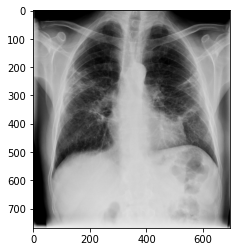

In [26]:
idx = random.randint(0, len(image_paths))
image = plt.imread(image_paths[idx])
print(image_paths[idx])
print(image.shape)
plt.imshow(image)

## Dataset

(224, 224, 1)
label: 1.0


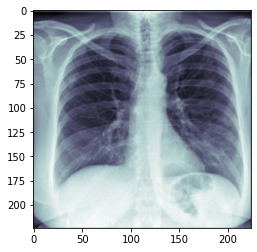

In [6]:
idx = random.randint(0, len(d_covid19))
image = d_covid19[idx]['img']
label = d_covid19[idx]['lab']
image = image.transpose(1, 2, 0)
print(image.shape)
print('label:', label[3])
plt.imshow(image, cmap='bone')

In [8]:
image_tensor = image.transpose(2, 0, 1)
image_tensor = np.expand_dims(image_tensor, 0)
image_tensor = torch.Tensor(image_tensor)

In [22]:
print(label)
print(model(image_tensor).detach())

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 1.]
tensor([[0.8240, 0.8162,    nan, 0.5826, 0.8048,    nan,    nan, 0.8671, 0.6746,
            nan, 0.7989,    nan,    nan,    nan, 0.7477, 0.6973, 0.8871, 0.7585]])
